다항 회귀 (Polynomial Regression)

다항 회귀란 무엇인가?

다항 회귀는 데이터의 관계를 직선이 아닌 곡선으로 표현하여 예측하는 회귀 모델입니다.

이는 선형 회귀의 확장된 형태로, 데이터에 가장 잘 맞는 직선을 찾는 대신, 가장 잘 맞는 **곡선(다항식)**을 찾는 것을 목표로 합니다.

다항 회귀는 선형 회귀와 마찬가지로 입력 특성과 예측값의 관계를 '선형적으로' 가정하지만, 

입력 특성(x) 자체에 제곱(x 
2
 )이나 세제곱(x 
3
 )과 같은 **차수(Degree)**를 추가하여 곡선 형태의 모델을 만들 수 있습니다.

다항 회귀의 원리
다항 회귀 모델은 다음의 방정식과 같이, 입력 특성(x)에 다양한 차수(x 
2
 ,x 
3
 ,...)를 추가하여 복잡한 관계를 모델링합니다.

1차식 (선형 회귀): y=w_1x+b

2차식 (다항 회귀): y=w_2x 
2
 +w_1x+b

3차식 (다항 회귀): y=w_3x 
3
 +w_2x 
2
 +w_1x+b

이때, degree는 모델이 몇 차식까지 고려할지를 결정하는 중요한 하이퍼파라미터입니다. degree=2로 설정하면 2차 곡선, degree=3으로 설정하면 3차 곡선을 사용하게 됩니다.

!(https://placehold.co/600x300/F44336/ffffff?text=데이터에+가장+잘+맞는+곡선을+찾는+다항+회귀)

위 이미지처럼 데이터가 직선이 아닌 곡선 형태를 보일 때, 다항 회귀는 이 관계를 더 정확하게 표현할 수 있습니다.

비선형 데이터셋 준비 완료.
--------------------------------------------------
원래 특성 데이터 형태: (100, 1)
다항식 변환 후 특성 데이터 형태: (100, 2)
--------------------------------------------------
다항 회귀 모델 훈련 완료.
--------------------------------------------------
모델의 계수(가중치, w): [[-0.02088803  0.80597803]]
모델의 절편(b): [0.16836633]
--------------------------------------------------


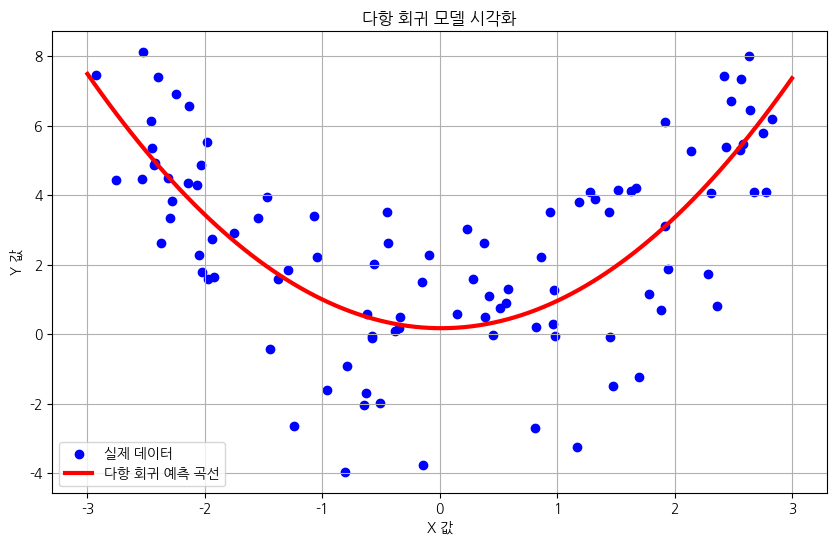

In [2]:
# 필요한 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# matplotlib에서 한글을 사용하기 위한 폰트 설정
# 폰트 설치는 이미 완료했으므로 캐시 지우기 후 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 1. 다항 회귀를 위한 가상의 비선형 데이터셋을 생성합니다.
# x는 -3부터 3까지의 값이며, y는 2차 방정식(y = x^2)에 노이즈를 추가한 형태입니다.
# 이렇게 하면 데이터가 직선이 아닌 곡선 형태를 띠게 됩니다.
X = np.sort(np.random.rand(100) * 6 - 3).reshape(-1, 1)
y = X**2 + 2 * np.random.randn(100, 1)

print("비선형 데이터셋 준비 완료.")
print("-" * 50)

# 2. 다항 회귀를 위해 특성을 변환합니다.
# `degree=2`는 특성(x)을 제곱(x^2) 형태로 추가해 2차 곡선 모델을 만들 준비를 합니다.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"원래 특성 데이터 형태: {X.shape}")
print(f"다항식 변환 후 특성 데이터 형태: {X_poly.shape}")
print("-" * 50)

# 3. 선형 회귀 모델을 사용해 다항 회귀를 수행합니다.
# 특성 변환을 거치면, 다항 회귀도 선형 회귀와 동일한 방식으로 모델을 학습시킵니다.
model = LinearRegression()
model.fit(X_poly, y)

print("다항 회귀 모델 훈련 완료.")
print("-" * 50)

# 4. 모델이 학습한 계수(가중치)를 확인합니다.
# 첫 번째 계수(coef_[0])는 x^2에 대한 가중치, 두 번째 계수(coef_[1])는 x에 대한 가중치입니다.
print(f"모델의 계수(가중치, w): {model.coef_}")
print(f"모델의 절편(b): {model.intercept_}")
print("-" * 50)

# 5. 결과를 시각화하여 비교합니다.
# 시각화를 위해 새로운 x값을 만들고 다항식 변환을 적용합니다.
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_pred = model.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.title("다항 회귀 모델 시각화")
plt.scatter(X, y, label='실제 데이터', color='blue')
plt.plot(X_new, y_pred, label='다항 회귀 예측 곡선', color='red', linewidth=3)
plt.xlabel("X 값")
plt.ylabel("Y 값")
plt.legend()
plt.grid(True)
plt.show()
